In a given dataset, we can find groups of features that are correlated among themselves or to a given
feature. From every one of these groups, we can retain the feature that brings most value to the
predictive model and remove the rest.
We can infer the value of the feature by its variability, utilizing pandas std(), by its cardinality,
utilizing pandas nunique() or by the amount of missing data with pandas isnull() followed by
sum().
We could also train a machine learning model utilizing only the features within the correlated group
and obtain the importance assigned to each feature by the model. Then, we would retain the feature
with the highest importance and remove the rest.
We can do all of that automatically with Feature-engine

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

from feature_engine.selection import SmartCorrelatedSelection


In [2]:
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.ensemble import RandomForestClassifier

In [3]:
from feature_engine.selection import DropCorrelatedFeatures

In [4]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [5]:
close_corr =data.corr(method = 'pearson')
close_corr

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
mean_atomic_mass,1.000000,0.815443,0.940210,0.745262,-0.104175,-0.098096,0.125842,0.446325,0.196643,0.130723,...,0.305133,0.392666,0.321934,-0.156998,-0.146226,-0.107039,0.170750,-0.079766,-0.081024,-0.113162
wtd_mean_atomic_mass,0.815443,1.000000,0.847636,0.964012,-0.308124,-0.413358,-0.143792,0.717191,-0.060526,-0.089369,...,0.545974,0.539945,0.549390,-0.375807,-0.331365,-0.038183,0.332698,-0.002807,0.077983,-0.311954
gmean_atomic_mass,0.940210,0.847636,1.000000,0.856449,-0.189982,-0.232456,-0.175801,0.458534,-0.121735,-0.166169,...,0.428030,0.511756,0.450532,-0.306164,-0.308083,-0.164446,0.274154,-0.124097,-0.117175,-0.229885
wtd_gmean_atomic_mass,0.745262,0.964012,0.856449,1.000000,-0.370411,-0.485170,-0.351986,0.673826,-0.274412,-0.331811,...,0.614231,0.608412,0.623435,-0.477714,-0.448308,-0.077587,0.411259,-0.032439,0.030924,-0.369429
entropy_atomic_mass,-0.104175,-0.308124,-0.189982,-0.370411,1.000000,0.889471,0.537854,-0.285161,0.356920,0.412836,...,-0.585717,-0.553177,-0.591685,0.963558,0.861150,0.202634,-0.349133,0.087673,0.018792,0.542854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,-0.107039,-0.038183,-0.164446,-0.077587,0.202634,0.160734,0.208458,0.023641,0.192080,0.177327,...,0.113189,-0.039978,0.034796,0.154607,0.203963,1.000000,0.114614,0.973837,0.867507,-0.144641
wtd_range_Valence,0.170750,0.332698,0.274154,0.411259,-0.349133,-0.546303,-0.363967,0.595038,-0.271879,-0.389699,...,0.684399,0.533512,0.682172,-0.416558,-0.639381,0.114614,1.000000,0.184713,0.132202,-0.439821
std_Valence,-0.079766,-0.002807,-0.124097,-0.032439,0.087673,0.056051,0.134726,0.067124,0.144277,0.123676,...,0.187765,0.035886,0.109815,0.034199,0.089699,0.973837,0.184713,1.000000,0.885844,-0.208882
wtd_std_Valence,-0.081024,0.077983,-0.117175,0.030924,0.018792,-0.006994,0.102883,0.093093,0.122862,0.156034,...,0.259755,0.089327,0.169942,-0.017114,0.081537,0.867507,0.132202,0.885844,1.000000,-0.300651


# Data preparation

In [6]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]



X.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [7]:
y.head()

0    29.0
1    26.0
2    19.0
3    22.0
4    23.0
Name: critical_temp, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

## Remove correlated: Feature-engine
#### Smart approach
###### _From each group of correlated variables, we retain the one with the highest importance, derived from a machine learning model._

In [9]:
# To remove correlated features
sel = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.6,
    selection_method='model_performance',
    estimator=RandomForestRegressor(n_estimators=5, random_state=10),
    scoring='r2',
    cv=5,
)

# fit finds the correlated features
sel.fit(X_train, y_train)  

SmartCorrelatedSelection(cv=5,
                         estimator=RandomForestRegressor(n_estimators=5,
                                                         random_state=10),
                         scoring='r2', selection_method='model_performance',
                         threshold=0.6)

In [10]:
sel.features_to_drop_

['mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'wtd_range_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'wtd_mean_fie',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'wtd_entropy_fie',
 'range_fie',
 'wtd_range_fie',
 'std_fie',
 'wtd_std_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'wtd_range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'wtd_gmean_Density',
 'entropy_Density',
 'wtd_entropy_Density',
 'range_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_mean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'entropy_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'range_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'mean_FusionHeat',
 'wtd_mean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'entropy_FusionH

In [11]:
sel.correlated_feature_sets_

[{'gmean_atomic_mass',
  'mean_Density',
  'mean_atomic_mass',
  'wtd_gmean_atomic_mass',
  'wtd_mean_Density',
  'wtd_mean_atomic_mass'},
 {'entropy_Density',
  'entropy_ElectronAffinity',
  'entropy_FusionHeat',
  'entropy_Valence',
  'entropy_atomic_mass',
  'entropy_atomic_radius',
  'entropy_fie',
  'range_ThermalConductivity',
  'range_atomic_radius',
  'range_fie',
  'std_fie',
  'wtd_entropy_Density',
  'wtd_entropy_ElectronAffinity',
  'wtd_entropy_FusionHeat',
  'wtd_entropy_Valence',
  'wtd_entropy_atomic_mass',
  'wtd_entropy_atomic_radius',
  'wtd_entropy_fie',
  'wtd_std_ThermalConductivity',
  'wtd_std_atomic_radius',
  'wtd_std_fie'},
 {'range_Density',
  'range_atomic_mass',
  'std_atomic_mass',
  'wtd_std_Density',
  'wtd_std_atomic_mass'},
 {'wtd_range_Density', 'wtd_range_atomic_mass', 'wtd_range_atomic_radius'},
 {'gmean_atomic_radius', 'gmean_fie', 'mean_atomic_radius', 'mean_fie'},
 {'gmean_Density',
  'std_atomic_radius',
  'wtd_gmean_Density',
  'wtd_gmean_atom

In [12]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((16954, 18), (4239, 18))

In [13]:
X_train_t.head()

,std_atomic_mass,gmean_atomic_radius,entropy_atomic_radius,mean_Density,gmean_Density,wtd_range_Density,std_Density,gmean_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,gmean_FusionHeat,gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_mean_Valence,wtd_range_Valence,std_Valence
15511,43.098264,110.098892,1.002546,6977.029967,212.740862,6436.184502,5094.708089,77.501109,32.994293,24.267811,5.431999,10.525894,0.693425,37.925750,38.963777,2.614130,2.125000,1.247219
2892,50.602625,110.717078,0.972142,5035.809667,428.526415,1732.885104,3740.622989,94.568481,68.240480,39.603479,2.636260,5.170344,0.140516,56.402156,185.567013,2.282087,0.871650,0.471405
3650,35.914688,155.077951,1.865338,3861.061286,1252.557188,1377.692077,2736.591787,25.117382,76.611692,52.637495,5.188988,18.196006,1.144411,61.524149,137.774946,2.123077,1.030769,0.451754
9028,70.392496,131.729022,1.260175,6501.357250,883.117278,1616.219268,5164.791227,25.084962,74.220430,62.076781,2.701702,6.313081,0.270718,47.775848,169.524558,2.000000,0.805257,0.000000
19291,34.981246,168.727482,1.577281,6075.000000,5605.652944,2519.104000,2186.170899,31.287634,31.094760,27.886125,13.573422,45.431663,1.445288,26.836000,30.676375,3.736000,1.824000,1.019804


# Scaling

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [15]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [16]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [17]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0899
Test MAE (LR_baseline) : 0.099 

Train R^2 (LR_baseline): 0.6196
Test R^2 (LR_baseline) : 0.5481 



# Cross-Validation

In [21]:
list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'neg_mean_squared_error', 'neg_mean_absolute_error'])

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_sc,
        y=y_train_sc,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
        cv=30,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = [
        np.mean(cv_result['fit_time']),
        np.mean(cv_result['score_time']),
        np.mean(cv_result['test_neg_mean_squared_error']),
        np.mean(cv_result['test_neg_mean_absolute_error']) 
    ]

print(cv_results)

                            fit_time  score_time  neg_mean_squared_error  \
RandomForestRegressor      57.886203    0.056380               -0.002754   
XGBRegressor                9.360668    0.006049               -0.003075   
KNeighborsRegressor         0.005787    0.141254               -0.003461   
LGBMRegressor               0.790192    0.008297               -0.003446   
SVR                         7.323541    0.457402               -0.006948   
DecisionTreeRegressor       0.593406    0.001991               -0.004479   
GradientBoostingRegressor  14.921249    0.003063               -0.005442   

                           neg_mean_absolute_error  
RandomForestRegressor                    -0.028978  
XGBRegressor                             -0.033427  
KNeighborsRegressor                      -0.032764  
LGBMRegressor                            -0.037504  
SVR                                      -0.063455  
DecisionTreeRegressor                    -0.034362  
GradientBoostingRegr

In [22]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=7,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  30.011761    0.030681               -0.003186


# RandomForestRegressor

In [23]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_15408\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.010664512620941712
Mean Absolute Error (MAE): 0.06877446462372723
R-squared (R2): 0.6905576048942788
mape: 8.531472201622814


# XGBRegressor

In [24]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.010021947691197198
Mean Absolute Error (MAE): 0.06841880540837897
R-squared (R2): 0.7092023229361168
mape: 7.920037469041439


In [18]:
import xgboost as xgb
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize

In [19]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer



param_space = {
    'eta': Real(0.001, 1.0, 'log-uniform'),
    'gamma': Real(0.001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 15),
    'min_child_weight': Integer(1, 10),
    'max_delta_step': Real(0.001, 10.0, 'log-uniform'),
    'lambda': Real(0.001, 10.0, 'log-uniform'),
    'alpha': Real(0.001, 10.0, 'log-uniform'),
    'tree_method': (['auto', 'exact', 'approx', 'hist', 'gpu_hist']),
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),    
    'max_leaves': Integer(2, 256)
}

model = XGBRegressor(random_state=42)

# Define the search algorithm with reduced n_iter and n_jobs
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,  # Reduce the number of iterations
    scoring='neg_mean_squared_error',
    cv=5,  # Number of cross-validation folds
    n_jobs=1,  # Use a single CPU core
    verbose=0
)

# Perform the search
search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

C:\Users\Misi\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters: OrderedDict([('alpha', 10.0), ('eta', 0.8959187968384907), ('gamma', 0.0209355217079606), ('lambda', 10.0), ('learning_rate', 0.8782347532361552), ('max_delta_step', 10.0), ('max_depth', 15), ('max_leaves', 76), ('min_child_weight', 5), ('tree_method', 'auto')])
Best MSE score: 111.99803807430062


In [20]:
model_2_tun = XGBRegressor(random_state=42, alpha=10.0, 
                            eta=0.8959187968384907, gamma=0.0209355217079606, reg_lambda= 10.0, 
                            learning_rate=0.8782347532361552, 
                            max_delta_step=10.0, max_depth=15,
                            max_leaves=76, min_child_weight=5, tree_method='auto')
model_2_tun.fit(X_train_sc, y_train_sc)
y_pred_2_tun = model_2_tun.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2_tun)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun)
r2 = r2_score(y_test_sc, y_pred_2_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.014125223852238416
Mean Absolute Error (MAE): 0.08015481976627167
R-squared (R2): 0.5901413167576008
mape: 16.60411712524239


In [30]:
param_space = {
    'eta': Real(0.001, 1.0, 'log-uniform'),
    'gamma': Real(0.001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 15),
    'min_child_weight': Integer(1, 10),
    'max_delta_step': Real(0.001, 10.0, 'log-uniform'),
    'lambda': Real(0.001, 10.0, 'log-uniform'),
    'alpha': Real(0.001, 10.0, 'log-uniform'),
    'tree_method': (['auto', 'exact', 'approx', 'hist', 'gpu_hist']),
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),    
    'max_leaves': Integer(2, 256)
}

model = XGBRegressor(random_state=42)

# Define the search algorithm with reduced n_iter and n_jobs
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=100,  # Reduce the number of iterations
    scoring='neg_mean_squared_error',
    cv=10,  # Number of cross-validation folds
    n_jobs=1,  # Use a single CPU core
    verbose=0
)

# Perform the search
search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

Best hyperparameters: OrderedDict([('alpha', 1.5648044891742143), ('eta', 1.0), ('gamma', 0.3997502434155023), ('lambda', 10.0), ('learning_rate', 0.5229167359524312), ('max_delta_step', 6.686465077404019), ('max_depth', 7), ('max_leaves', 209), ('min_child_weight', 6), ('tree_method', 'approx')])
Best MSE score: 95.42572024250839


In [31]:
model_2_tun_2 = XGBRegressor(random_state=42, alpha=1.5648044891742143, 
                            eta=1.0, gamma=0.3997502434155023, reg_lambda= 10.0, 
                            learning_rate=0.5229167359524312, 
                            max_delta_step=6.686465077404019, max_depth=7,
                            max_leaves=209, min_child_weight=6, tree_method='approx')
model_2_tun_2.fit(X_train_sc, y_train_sc)
y_pred_2_tun_2 = model_2_tun_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2_tun_2)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_2)
r2 = r2_score(y_test_sc, y_pred_2_tun_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.01102566708092565
Mean Absolute Error (MAE): 0.0748160927631149
R-squared (R2): 0.6800783167099236
mape: 14.593532075213544


In [32]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

In [33]:
param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}

# Initialize Trials to keep track of results
trials = Trials()

# Define the number of iterations for optimization
num_iterations = 100

# Run the hyperparameter optimization with a progress bar
best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|██████████| 100/100 [03:45<00:00,  2.25s/iter]

Best hyperparameters: {'alpha': 0.19964849471411605, 'eta': 0.05201879967691589, 'gamma': 0.002815117302878753, 'lambda': 0.14615057091776643, 'learning_rate': 0.21690226851267252, 'max_delta_step': 0.07731587046606002, 'max_depth': 15.0, 'min_child_weight': 8.0, 'tree_method': 1}
Best MSE score: 0.003005633145839396


In [34]:
model_2_tun_3 = XGBRegressor(random_state=42, alpha=0.19964849471411605, 
                            eta=0.05201879967691589, gamma=0.002815117302878753, reg_lambda= 0.14615057091776643, 
                            learning_rate=0.21690226851267252, 
                            max_delta_step=0.07731587046606002, max_depth=15,
                             min_child_weight=8, tree_method='exact')
model_2_tun_3.fit(X_train_sc, y_train_sc)
y_pred_2_tun_3 = model_2_tun_3.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_3)
r2 = r2_score(y_test_sc, y_pred_2_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.009298742844847878
Mean Absolute Error (MAE): 0.0653555800434934
R-squared (R2): 0.73018689558006
mape: 10.045174455567402


In [35]:
param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}

# Initialize Trials to keep track of results
trials = Trials()

# Define the number of iterations for optimization
num_iterations = 50

# Run the hyperparameter optimization with a progress bar
best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|██████████| 50/50 [02:08<00:00,  2.58s/iter]

Best hyperparameters: {'alpha': 0.02353701598702385, 'eta': 0.4235513258705285, 'gamma': 0.0033568488870457246, 'lambda': 0.06074651825235504, 'learning_rate': 0.09141789080199007, 'max_delta_step': 0.13868016033510686, 'max_depth': 14.0, 'min_child_weight': 8.0, 'tree_method': 1}
Best MSE score: 0.002985536655336636


In [17]:
model_2_tun_4 = XGBRegressor(random_state=42, alpha=0.014190197254501134, 
                            eta=0.0024008106628740423, gamma=0.002244520393811237, reg_lambda= 9.985298470559975, 
                            learning_rate=0.25158311214527335, 
                            max_delta_step=0.29982779616781496, max_depth=13,
                             min_child_weight=10, tree_method='exact')
model_2_tun_4.fit(X_train_sc, y_train_sc)
y_pred_2_tun_4 = model_2_tun_4.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2_tun_4)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun_4)
r2 = r2_score(y_test_sc, y_pred_2_tun_4)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun_4)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.00659715490010368
Mean Absolute Error (MAE): 0.05363615422594783
R-squared (R2): 0.8085763985910814
mape: 8.813511372177425


In [23]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc_2 = scaler.inverse_transform(y_pred_2_tun_4.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc_2 = y_pred_unsc_2.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc_2': y_pred_unsc_2})

print(result_df)

      y_test_unsc  y_pred_unsc_2
0            38.0      41.289116
1            13.4      12.069716
2            69.5      68.724380
3            92.8      64.301163
4            68.0      85.397659
...           ...            ...
4234        101.1      79.208496
4235         87.5      75.136703
4236          5.1       6.487454
4237         36.0      31.522999
4238         24.6      21.122255

[4239 rows x 2 columns]


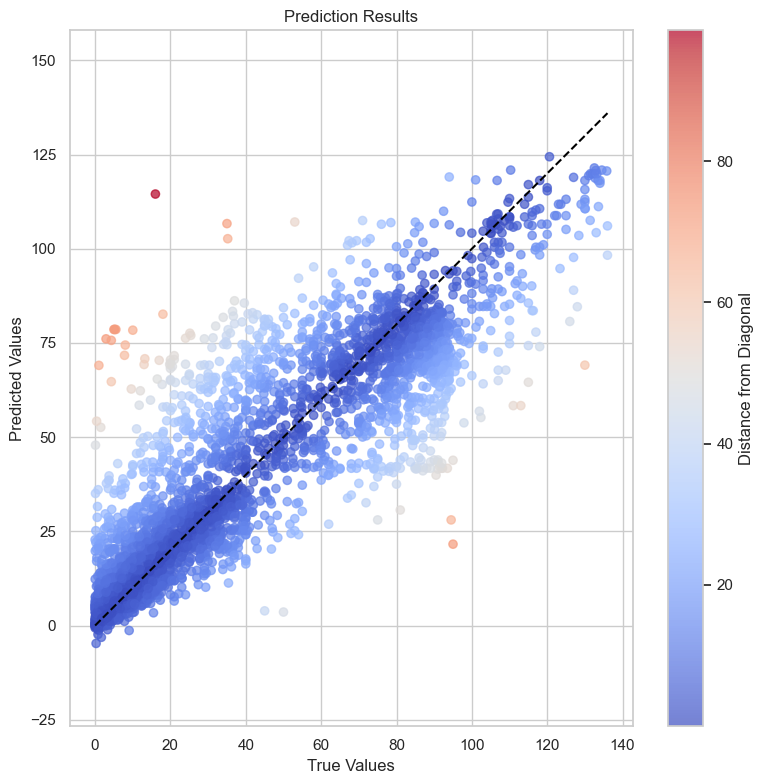

In [24]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc_2'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc_2'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

# CatBoostRegressor

In [25]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1724401	total: 148ms	remaining: 29.5s
50:	learn: 0.0721954	total: 355ms	remaining: 1.04s
100:	learn: 0.0647917	total: 556ms	remaining: 545ms
150:	learn: 0.0602259	total: 760ms	remaining: 247ms
199:	learn: 0.0571260	total: 967ms	remaining: 0us
Mean Squared Error (MSE): 0.009495879526060002
Mean Absolute Error (MAE): 0.06681643805200006
R-squared (R2): 0.7244667610586114
mape: 9.854775398543097


In [ ]:
from hyperopt import space_eval

In [43]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials, 
            rstate=random_state) 
            
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|██████████| 50/50 [40:42<00:00, 48.85s/trial, best loss: 0.0029056003692262667] 
Mean Squared Error (MSE): 0.009137020983694757
Mean Absolute Error (MAE): 0.06371205307508629
R-squared (R2): 0.7348794307042538
mape: 5.228804510906528


In [42]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'depth': hp.choice('depth', [2, 4, 6, 8, 10]),
    'iterations': hp.choice('iterations', [50, 100, 200, 400, 800]),
    'model_size_reg': hp.uniform('model_size_reg', 0, 1),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
    'reg_lambda': hp.loguniform('reg_lambda', -9, 2),
    'max_bin': hp.choice('max_bin', [8, 16, 32, 64, 128]),
    'min_child_samples': hp.choice('min_child_samples', [2, 5, 10, 15, 20])
}

# define the objective function to minimize (negative mean squared error)
def objective(params):
    model = CatBoostRegressor(
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        iterations=params['iterations'],
        model_size_reg=params['model_size_reg'],
        boosting_type=params['boosting_type'],
        reg_lambda=params['reg_lambda'],
        max_bin=params['max_bin'],
        min_child_samples=params['min_child_samples'],
        silent=True,
        random_state=42
    )
    scores = -cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
    score = np.mean(scores)
    return score

# set up the hyperparameter tuning using the Tree-structured Parzen Estimator (TPE) algorithm
trials = Trials()
random_state= np.random.default_rng(seed=42)
#random_state = np.random.RandomState(seed=42)
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials, 
            rstate=random_state) 
            
# print the best hyperparameters and the corresponding mean cross-validation score

best_params = space_eval(space, best)
model_3_tun = CatBoostRegressor(**best_params, silent=True, random_state=42)
model_3_tun.fit(X_train_sc, y_train_sc)
y_pred_3_tun_3 = model_3_tun.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

100%|██████████| 100/100 [18:26<00:00, 11.07s/trial, best loss: 0.0029056003692262667]
Mean Squared Error (MSE): 0.009137020983694757
Mean Absolute Error (MAE): 0.06371205307508629
R-squared (R2): 0.7348794307042538
mape: 5.228804510906528


In [38]:
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1808140	total: 20.4ms	remaining: 20.4s
1:	learn: 0.1766676	total: 36.9ms	remaining: 18.4s
2:	learn: 0.1726788	total: 55.6ms	remaining: 18.5s
3:	learn: 0.1687371	total: 73ms	remaining: 18.2s
4:	learn: 0.1649263	total: 91.4ms	remaining: 18.2s
5:	learn: 0.1612356	total: 108ms	remaining: 17.9s
6:	learn: 0.1576769	total: 129ms	remaining: 18.2s
7:	learn: 0.1540896	total: 147ms	remaining: 18.3s
8:	learn: 0.1507482	total: 163ms	remaining: 18s
9:	learn: 0.1475999	total: 181ms	remaining: 17.9s
10:	learn: 0.1446151	total: 198ms	remaining: 17.8s
11:	learn: 0.1416575	total: 215ms	remaining: 17.7s
12:	learn: 0.1385988	total: 236ms	remaining: 17.9s
13:	learn: 0.1358067	total: 257ms	remaining: 18.1s
14:	learn: 0.1331512	total: 278ms	remaining: 18.3s
15:	learn: 0.1304354	total: 297ms	remaining: 18.3s
16:	learn: 0.1279010	total: 318ms	remaining: 18.4s
17:	learn: 0.1253387	total: 338ms	remaining: 18.5s
18:	learn: 0.1228946	total: 358ms	remaining: 18.5s
19:	learn: 0.1206188	total: 378ms	remain

163:	learn: 0.0473959	total: 3.28s	remaining: 16.7s
164:	learn: 0.0473022	total: 3.31s	remaining: 16.7s
165:	learn: 0.0472163	total: 3.33s	remaining: 16.7s
166:	learn: 0.0470907	total: 3.34s	remaining: 16.7s
167:	learn: 0.0470433	total: 3.36s	remaining: 16.6s
168:	learn: 0.0469608	total: 3.38s	remaining: 16.6s
169:	learn: 0.0468412	total: 3.39s	remaining: 16.6s
170:	learn: 0.0467351	total: 3.41s	remaining: 16.6s
171:	learn: 0.0466507	total: 3.43s	remaining: 16.5s
172:	learn: 0.0465748	total: 3.45s	remaining: 16.5s
173:	learn: 0.0464746	total: 3.46s	remaining: 16.4s
174:	learn: 0.0464162	total: 3.48s	remaining: 16.4s
175:	learn: 0.0463305	total: 3.5s	remaining: 16.4s
176:	learn: 0.0462538	total: 3.52s	remaining: 16.4s
177:	learn: 0.0461758	total: 3.53s	remaining: 16.3s
178:	learn: 0.0461234	total: 3.55s	remaining: 16.3s
179:	learn: 0.0460505	total: 3.57s	remaining: 16.2s
180:	learn: 0.0459608	total: 3.58s	remaining: 16.2s
181:	learn: 0.0458850	total: 3.6s	remaining: 16.2s
182:	learn: 0.

330:	learn: 0.0381295	total: 6.28s	remaining: 12.7s
331:	learn: 0.0380852	total: 6.3s	remaining: 12.7s
332:	learn: 0.0380088	total: 6.32s	remaining: 12.7s
333:	learn: 0.0379526	total: 6.34s	remaining: 12.6s
334:	learn: 0.0378995	total: 6.36s	remaining: 12.6s
335:	learn: 0.0378540	total: 6.37s	remaining: 12.6s
336:	learn: 0.0377877	total: 6.39s	remaining: 12.6s
337:	learn: 0.0377482	total: 6.41s	remaining: 12.6s
338:	learn: 0.0377167	total: 6.43s	remaining: 12.5s
339:	learn: 0.0376762	total: 6.45s	remaining: 12.5s
340:	learn: 0.0376188	total: 6.46s	remaining: 12.5s
341:	learn: 0.0375506	total: 6.48s	remaining: 12.5s
342:	learn: 0.0375060	total: 6.5s	remaining: 12.4s
343:	learn: 0.0374429	total: 6.52s	remaining: 12.4s
344:	learn: 0.0373809	total: 6.53s	remaining: 12.4s
345:	learn: 0.0373329	total: 6.55s	remaining: 12.4s
346:	learn: 0.0373224	total: 6.56s	remaining: 12.3s
347:	learn: 0.0372926	total: 6.58s	remaining: 12.3s
348:	learn: 0.0372311	total: 6.59s	remaining: 12.3s
349:	learn: 0.

491:	learn: 0.0327899	total: 8.63s	remaining: 8.91s
492:	learn: 0.0327690	total: 8.65s	remaining: 8.89s
493:	learn: 0.0327581	total: 8.66s	remaining: 8.87s
494:	learn: 0.0327444	total: 8.67s	remaining: 8.84s
495:	learn: 0.0327318	total: 8.68s	remaining: 8.82s
496:	learn: 0.0327245	total: 8.7s	remaining: 8.8s
497:	learn: 0.0326916	total: 8.71s	remaining: 8.78s
498:	learn: 0.0326793	total: 8.72s	remaining: 8.76s
499:	learn: 0.0326632	total: 8.74s	remaining: 8.74s
500:	learn: 0.0326506	total: 8.75s	remaining: 8.72s
501:	learn: 0.0326218	total: 8.77s	remaining: 8.7s
502:	learn: 0.0325975	total: 8.78s	remaining: 8.67s
503:	learn: 0.0325806	total: 8.79s	remaining: 8.65s
504:	learn: 0.0325468	total: 8.81s	remaining: 8.63s
505:	learn: 0.0325179	total: 8.82s	remaining: 8.61s
506:	learn: 0.0325065	total: 8.83s	remaining: 8.59s
507:	learn: 0.0324892	total: 8.85s	remaining: 8.57s
508:	learn: 0.0324638	total: 8.86s	remaining: 8.55s
509:	learn: 0.0324434	total: 8.87s	remaining: 8.52s
510:	learn: 0.0

659:	learn: 0.0299820	total: 10.8s	remaining: 5.57s
660:	learn: 0.0299757	total: 10.8s	remaining: 5.55s
661:	learn: 0.0299647	total: 10.8s	remaining: 5.53s
662:	learn: 0.0299348	total: 10.8s	remaining: 5.51s
663:	learn: 0.0299171	total: 10.9s	remaining: 5.49s
664:	learn: 0.0298989	total: 10.9s	remaining: 5.47s
665:	learn: 0.0298855	total: 10.9s	remaining: 5.46s
666:	learn: 0.0298733	total: 10.9s	remaining: 5.44s
667:	learn: 0.0298555	total: 10.9s	remaining: 5.42s
668:	learn: 0.0298483	total: 10.9s	remaining: 5.4s
669:	learn: 0.0298256	total: 10.9s	remaining: 5.38s
670:	learn: 0.0298054	total: 10.9s	remaining: 5.37s
671:	learn: 0.0298008	total: 11s	remaining: 5.35s
672:	learn: 0.0297872	total: 11s	remaining: 5.33s
673:	learn: 0.0297673	total: 11s	remaining: 5.31s
674:	learn: 0.0297461	total: 11s	remaining: 5.3s
675:	learn: 0.0297356	total: 11s	remaining: 5.28s
676:	learn: 0.0297101	total: 11s	remaining: 5.26s
677:	learn: 0.0296971	total: 11s	remaining: 5.24s
678:	learn: 0.0296750	total:

831:	learn: 0.0280221	total: 12.9s	remaining: 2.61s
832:	learn: 0.0280060	total: 13s	remaining: 2.6s
833:	learn: 0.0279969	total: 13s	remaining: 2.58s
834:	learn: 0.0279922	total: 13s	remaining: 2.56s
835:	learn: 0.0279907	total: 13s	remaining: 2.55s
836:	learn: 0.0279833	total: 13s	remaining: 2.53s
837:	learn: 0.0279727	total: 13s	remaining: 2.52s
838:	learn: 0.0279626	total: 13s	remaining: 2.5s
839:	learn: 0.0279476	total: 13.1s	remaining: 2.49s
840:	learn: 0.0279371	total: 13.1s	remaining: 2.47s
841:	learn: 0.0279334	total: 13.1s	remaining: 2.45s
842:	learn: 0.0279205	total: 13.1s	remaining: 2.44s
843:	learn: 0.0279084	total: 13.1s	remaining: 2.42s
844:	learn: 0.0279018	total: 13.1s	remaining: 2.4s
845:	learn: 0.0278984	total: 13.1s	remaining: 2.39s
846:	learn: 0.0278904	total: 13.1s	remaining: 2.37s
847:	learn: 0.0278800	total: 13.1s	remaining: 2.35s
848:	learn: 0.0278743	total: 13.2s	remaining: 2.34s
849:	learn: 0.0278665	total: 13.2s	remaining: 2.32s
850:	learn: 0.0278636	total: 

Best hyperparameters: OrderedDict([('bagging_temperature', 0.9), ('border_count', 100), ('depth', 10), ('grow_policy', 'Depthwise'), ('l2_leaf_reg', 1.0), ('learning_rate', 0.030617090866946), ('min_data_in_leaf', 5)])
Best MSE score: 0.002807366550122086


In [19]:
best_hyperparameters = {
    'bagging_temperature': 0.9,
    'border_count':100,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 1.0,
    'learning_rate': 0.030617090866946,
    'min_data_in_leaf': 5
}


model_3_tun_2 = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun_2.fit(X_train_sc, y_train_sc)


y_pred_3_tun_2 = model_3_tun_2.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_2)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_2)
r2 = r2_score(y_test_sc, y_pred_3_tun_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1807061	total: 203ms	remaining: 3m 23s
1:	learn: 0.1763016	total: 252ms	remaining: 2m 5s
2:	learn: 0.1721828	total: 282ms	remaining: 1m 33s
3:	learn: 0.1682129	total: 310ms	remaining: 1m 17s
4:	learn: 0.1643826	total: 335ms	remaining: 1m 6s
5:	learn: 0.1607976	total: 360ms	remaining: 59.6s
6:	learn: 0.1570232	total: 387ms	remaining: 54.9s
7:	learn: 0.1535777	total: 411ms	remaining: 51s
8:	learn: 0.1502291	total: 438ms	remaining: 48.2s
9:	learn: 0.1472220	total: 459ms	remaining: 45.5s
10:	learn: 0.1440228	total: 489ms	remaining: 44s
11:	learn: 0.1411456	total: 515ms	remaining: 42.4s
12:	learn: 0.1381089	total: 541ms	remaining: 41.1s
13:	learn: 0.1351774	total: 569ms	remaining: 40s
14:	learn: 0.1324924	total: 591ms	remaining: 38.8s
15:	learn: 0.1298290	total: 615ms	remaining: 37.8s
16:	learn: 0.1273021	total: 643ms	remaining: 37.2s
17:	learn: 0.1248316	total: 675ms	remaining: 36.8s
18:	learn: 0.1223636	total: 701ms	remaining: 36.2s
19:	learn: 0.1202647	total: 720ms	remaining:

166:	learn: 0.0479367	total: 4.89s	remaining: 24.4s
167:	learn: 0.0478740	total: 4.91s	remaining: 24.3s
168:	learn: 0.0478252	total: 4.94s	remaining: 24.3s
169:	learn: 0.0477521	total: 4.96s	remaining: 24.2s
170:	learn: 0.0476818	total: 4.99s	remaining: 24.2s
171:	learn: 0.0476350	total: 5.02s	remaining: 24.1s
172:	learn: 0.0475770	total: 5.04s	remaining: 24.1s
173:	learn: 0.0475142	total: 5.06s	remaining: 24s
174:	learn: 0.0474542	total: 5.09s	remaining: 24s
175:	learn: 0.0473957	total: 5.12s	remaining: 24s
176:	learn: 0.0473288	total: 5.14s	remaining: 23.9s
177:	learn: 0.0472342	total: 5.17s	remaining: 23.9s
178:	learn: 0.0472073	total: 5.19s	remaining: 23.8s
179:	learn: 0.0470920	total: 5.22s	remaining: 23.8s
180:	learn: 0.0469973	total: 5.24s	remaining: 23.7s
181:	learn: 0.0469281	total: 5.27s	remaining: 23.7s
182:	learn: 0.0468605	total: 5.29s	remaining: 23.6s
183:	learn: 0.0468015	total: 5.32s	remaining: 23.6s
184:	learn: 0.0467419	total: 5.34s	remaining: 23.5s
185:	learn: 0.0466

334:	learn: 0.0402983	total: 8.81s	remaining: 17.5s
335:	learn: 0.0402125	total: 8.84s	remaining: 17.5s
336:	learn: 0.0401649	total: 8.87s	remaining: 17.4s
337:	learn: 0.0401399	total: 8.89s	remaining: 17.4s
338:	learn: 0.0401249	total: 8.9s	remaining: 17.4s
339:	learn: 0.0401035	total: 8.92s	remaining: 17.3s
340:	learn: 0.0400709	total: 8.94s	remaining: 17.3s
341:	learn: 0.0400091	total: 8.96s	remaining: 17.2s
342:	learn: 0.0399495	total: 8.98s	remaining: 17.2s
343:	learn: 0.0399234	total: 9s	remaining: 17.2s
344:	learn: 0.0398927	total: 9.03s	remaining: 17.1s
345:	learn: 0.0398171	total: 9.05s	remaining: 17.1s
346:	learn: 0.0397653	total: 9.08s	remaining: 17.1s
347:	learn: 0.0397500	total: 9.1s	remaining: 17.1s
348:	learn: 0.0396893	total: 9.13s	remaining: 17s
349:	learn: 0.0396407	total: 9.15s	remaining: 17s
350:	learn: 0.0396222	total: 9.17s	remaining: 17s
351:	learn: 0.0395749	total: 9.19s	remaining: 16.9s
352:	learn: 0.0395574	total: 9.21s	remaining: 16.9s
353:	learn: 0.0395188	t

501:	learn: 0.0351507	total: 12.1s	remaining: 12s
502:	learn: 0.0351259	total: 12.1s	remaining: 11.9s
503:	learn: 0.0351026	total: 12.1s	remaining: 11.9s
504:	learn: 0.0350752	total: 12.1s	remaining: 11.9s
505:	learn: 0.0350658	total: 12.1s	remaining: 11.9s
506:	learn: 0.0350465	total: 12.2s	remaining: 11.8s
507:	learn: 0.0350414	total: 12.2s	remaining: 11.8s
508:	learn: 0.0350265	total: 12.2s	remaining: 11.8s
509:	learn: 0.0350175	total: 12.2s	remaining: 11.7s
510:	learn: 0.0349960	total: 12.2s	remaining: 11.7s
511:	learn: 0.0349892	total: 12.2s	remaining: 11.7s
512:	learn: 0.0349563	total: 12.3s	remaining: 11.6s
513:	learn: 0.0349541	total: 12.3s	remaining: 11.6s
514:	learn: 0.0349390	total: 12.3s	remaining: 11.6s
515:	learn: 0.0349156	total: 12.3s	remaining: 11.6s
516:	learn: 0.0348691	total: 12.3s	remaining: 11.5s
517:	learn: 0.0348468	total: 12.4s	remaining: 11.5s
518:	learn: 0.0348102	total: 12.4s	remaining: 11.5s
519:	learn: 0.0347815	total: 12.4s	remaining: 11.4s
520:	learn: 0.

663:	learn: 0.0324336	total: 15.1s	remaining: 7.62s
664:	learn: 0.0324293	total: 15.1s	remaining: 7.6s
665:	learn: 0.0324168	total: 15.1s	remaining: 7.57s
666:	learn: 0.0324060	total: 15.1s	remaining: 7.55s
667:	learn: 0.0323968	total: 15.1s	remaining: 7.52s
668:	learn: 0.0323703	total: 15.2s	remaining: 7.5s
669:	learn: 0.0323632	total: 15.2s	remaining: 7.47s
670:	learn: 0.0323576	total: 15.2s	remaining: 7.45s
671:	learn: 0.0323336	total: 15.2s	remaining: 7.43s
672:	learn: 0.0323183	total: 15.2s	remaining: 7.4s
673:	learn: 0.0323026	total: 15.3s	remaining: 7.38s
674:	learn: 0.0322814	total: 15.3s	remaining: 7.36s
675:	learn: 0.0322785	total: 15.3s	remaining: 7.33s
676:	learn: 0.0322565	total: 15.3s	remaining: 7.31s
677:	learn: 0.0322391	total: 15.3s	remaining: 7.28s
678:	learn: 0.0322346	total: 15.3s	remaining: 7.25s
679:	learn: 0.0322252	total: 15.4s	remaining: 7.23s
680:	learn: 0.0322188	total: 15.4s	remaining: 7.21s
681:	learn: 0.0321939	total: 15.4s	remaining: 7.18s
682:	learn: 0.0

823:	learn: 0.0308279	total: 17.9s	remaining: 3.82s
824:	learn: 0.0308121	total: 17.9s	remaining: 3.8s
825:	learn: 0.0307901	total: 17.9s	remaining: 3.78s
826:	learn: 0.0307882	total: 18s	remaining: 3.75s
827:	learn: 0.0307762	total: 18s	remaining: 3.73s
828:	learn: 0.0307736	total: 18s	remaining: 3.71s
829:	learn: 0.0307723	total: 18s	remaining: 3.69s
830:	learn: 0.0307694	total: 18s	remaining: 3.66s
831:	learn: 0.0307565	total: 18s	remaining: 3.64s
832:	learn: 0.0307506	total: 18.1s	remaining: 3.62s
833:	learn: 0.0307487	total: 18.1s	remaining: 3.6s
834:	learn: 0.0307424	total: 18.1s	remaining: 3.57s
835:	learn: 0.0307265	total: 18.1s	remaining: 3.55s
836:	learn: 0.0307134	total: 18.1s	remaining: 3.53s
837:	learn: 0.0307108	total: 18.1s	remaining: 3.51s
838:	learn: 0.0306990	total: 18.2s	remaining: 3.48s
839:	learn: 0.0306862	total: 18.2s	remaining: 3.46s
840:	learn: 0.0306824	total: 18.2s	remaining: 3.44s
841:	learn: 0.0306766	total: 18.2s	remaining: 3.42s
842:	learn: 0.0306720	tota

989:	learn: 0.0296149	total: 20.7s	remaining: 209ms
990:	learn: 0.0296063	total: 20.7s	remaining: 188ms
991:	learn: 0.0295976	total: 20.7s	remaining: 167ms
992:	learn: 0.0295917	total: 20.7s	remaining: 146ms
993:	learn: 0.0295878	total: 20.7s	remaining: 125ms
994:	learn: 0.0295867	total: 20.8s	remaining: 104ms
995:	learn: 0.0295832	total: 20.8s	remaining: 83.4ms
996:	learn: 0.0295669	total: 20.8s	remaining: 62.6ms
997:	learn: 0.0295533	total: 20.8s	remaining: 41.7ms
998:	learn: 0.0295521	total: 20.8s	remaining: 20.9ms
999:	learn: 0.0295493	total: 20.9s	remaining: 0us
Mean Squared Error (MSE): 0.005967243929686164
Mean Absolute Error (MAE): 0.051250141485414465
R-squared (R2): 0.8268539482848765
mape: 7.856332126685968


In [36]:
param_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(1.0, 10.0, 'log-uniform'),
    'border_count': Integer(1, 100),
    'bagging_temperature': Real(0.1, 0.9),
    'min_data_in_leaf': Integer(5, 50),
    'grow_policy': Categorical(['SymmetricTree', 'Depthwise', 'Lossguide']),
}

# Create the CatBoostRegressor model
model = CatBoostRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

0:	learn: 0.1788816	total: 148ms	remaining: 2m 27s
1:	learn: 0.1729403	total: 161ms	remaining: 1m 20s
2:	learn: 0.1674672	total: 173ms	remaining: 57.5s
3:	learn: 0.1622423	total: 186ms	remaining: 46.3s
4:	learn: 0.1572107	total: 200ms	remaining: 39.8s
5:	learn: 0.1524272	total: 212ms	remaining: 35.2s
6:	learn: 0.1478445	total: 225ms	remaining: 32s
7:	learn: 0.1433779	total: 239ms	remaining: 29.6s
8:	learn: 0.1391449	total: 252ms	remaining: 27.7s
9:	learn: 0.1350761	total: 265ms	remaining: 26.2s
10:	learn: 0.1313074	total: 278ms	remaining: 25s
11:	learn: 0.1276869	total: 291ms	remaining: 23.9s
12:	learn: 0.1244263	total: 304ms	remaining: 23.1s
13:	learn: 0.1213804	total: 315ms	remaining: 22.2s
14:	learn: 0.1185123	total: 327ms	remaining: 21.5s
15:	learn: 0.1155318	total: 340ms	remaining: 20.9s
16:	learn: 0.1126932	total: 354ms	remaining: 20.4s
17:	learn: 0.1100608	total: 369ms	remaining: 20.1s
18:	learn: 0.1074013	total: 385ms	remaining: 19.9s
19:	learn: 0.1048571	total: 399ms	remaining

171:	learn: 0.0457134	total: 2.47s	remaining: 11.9s
172:	learn: 0.0456474	total: 2.49s	remaining: 11.9s
173:	learn: 0.0455784	total: 2.5s	remaining: 11.9s
174:	learn: 0.0455258	total: 2.51s	remaining: 11.8s
175:	learn: 0.0454403	total: 2.52s	remaining: 11.8s
176:	learn: 0.0453959	total: 2.53s	remaining: 11.8s
177:	learn: 0.0453213	total: 2.55s	remaining: 11.8s
178:	learn: 0.0452618	total: 2.56s	remaining: 11.7s
179:	learn: 0.0452036	total: 2.57s	remaining: 11.7s
180:	learn: 0.0451285	total: 2.58s	remaining: 11.7s
181:	learn: 0.0450385	total: 2.59s	remaining: 11.7s
182:	learn: 0.0449875	total: 2.6s	remaining: 11.6s
183:	learn: 0.0449080	total: 2.62s	remaining: 11.6s
184:	learn: 0.0448302	total: 2.63s	remaining: 11.6s
185:	learn: 0.0448042	total: 2.63s	remaining: 11.5s
186:	learn: 0.0447364	total: 2.65s	remaining: 11.5s
187:	learn: 0.0446647	total: 2.66s	remaining: 11.5s
188:	learn: 0.0446211	total: 2.67s	remaining: 11.4s
189:	learn: 0.0445399	total: 2.68s	remaining: 11.4s
190:	learn: 0.

341:	learn: 0.0370157	total: 4.17s	remaining: 8.03s
342:	learn: 0.0369727	total: 4.18s	remaining: 8.01s
343:	learn: 0.0369530	total: 4.19s	remaining: 7.99s
344:	learn: 0.0369229	total: 4.2s	remaining: 7.97s
345:	learn: 0.0368985	total: 4.21s	remaining: 7.95s
346:	learn: 0.0368616	total: 4.21s	remaining: 7.93s
347:	learn: 0.0368439	total: 4.22s	remaining: 7.91s
348:	learn: 0.0367962	total: 4.23s	remaining: 7.9s
349:	learn: 0.0367724	total: 4.24s	remaining: 7.88s
350:	learn: 0.0367422	total: 4.25s	remaining: 7.86s
351:	learn: 0.0367010	total: 4.26s	remaining: 7.84s
352:	learn: 0.0366608	total: 4.27s	remaining: 7.83s
353:	learn: 0.0366015	total: 4.28s	remaining: 7.81s
354:	learn: 0.0365833	total: 4.29s	remaining: 7.79s
355:	learn: 0.0365529	total: 4.3s	remaining: 7.78s
356:	learn: 0.0365304	total: 4.31s	remaining: 7.76s
357:	learn: 0.0365166	total: 4.32s	remaining: 7.74s
358:	learn: 0.0364801	total: 4.33s	remaining: 7.72s
359:	learn: 0.0364402	total: 4.33s	remaining: 7.71s
360:	learn: 0.0

507:	learn: 0.0329566	total: 5.65s	remaining: 5.47s
508:	learn: 0.0329487	total: 5.66s	remaining: 5.46s
509:	learn: 0.0329359	total: 5.67s	remaining: 5.45s
510:	learn: 0.0329243	total: 5.68s	remaining: 5.43s
511:	learn: 0.0329095	total: 5.69s	remaining: 5.42s
512:	learn: 0.0329021	total: 5.69s	remaining: 5.41s
513:	learn: 0.0328933	total: 5.7s	remaining: 5.39s
514:	learn: 0.0328896	total: 5.71s	remaining: 5.38s
515:	learn: 0.0328759	total: 5.72s	remaining: 5.36s
516:	learn: 0.0328640	total: 5.72s	remaining: 5.35s
517:	learn: 0.0328504	total: 5.73s	remaining: 5.33s
518:	learn: 0.0328448	total: 5.74s	remaining: 5.32s
519:	learn: 0.0328240	total: 5.75s	remaining: 5.31s
520:	learn: 0.0328094	total: 5.76s	remaining: 5.3s
521:	learn: 0.0327899	total: 5.77s	remaining: 5.28s
522:	learn: 0.0327634	total: 5.78s	remaining: 5.27s
523:	learn: 0.0327493	total: 5.79s	remaining: 5.26s
524:	learn: 0.0327229	total: 5.79s	remaining: 5.24s
525:	learn: 0.0327000	total: 5.8s	remaining: 5.23s
526:	learn: 0.0

677:	learn: 0.0306885	total: 7.1s	remaining: 3.37s
678:	learn: 0.0306659	total: 7.11s	remaining: 3.36s
679:	learn: 0.0306498	total: 7.12s	remaining: 3.35s
680:	learn: 0.0306389	total: 7.13s	remaining: 3.34s
681:	learn: 0.0306215	total: 7.14s	remaining: 3.33s
682:	learn: 0.0306124	total: 7.15s	remaining: 3.32s
683:	learn: 0.0305996	total: 7.15s	remaining: 3.31s
684:	learn: 0.0305884	total: 7.16s	remaining: 3.29s
685:	learn: 0.0305773	total: 7.17s	remaining: 3.28s
686:	learn: 0.0305685	total: 7.18s	remaining: 3.27s
687:	learn: 0.0305611	total: 7.19s	remaining: 3.26s
688:	learn: 0.0305516	total: 7.2s	remaining: 3.25s
689:	learn: 0.0305415	total: 7.21s	remaining: 3.24s
690:	learn: 0.0305267	total: 7.22s	remaining: 3.23s
691:	learn: 0.0305225	total: 7.22s	remaining: 3.22s
692:	learn: 0.0305093	total: 7.23s	remaining: 3.2s
693:	learn: 0.0305020	total: 7.24s	remaining: 3.19s
694:	learn: 0.0304856	total: 7.25s	remaining: 3.18s
695:	learn: 0.0304827	total: 7.26s	remaining: 3.17s
696:	learn: 0.0

844:	learn: 0.0291420	total: 8.54s	remaining: 1.57s
845:	learn: 0.0291351	total: 8.55s	remaining: 1.55s
846:	learn: 0.0291264	total: 8.55s	remaining: 1.54s
847:	learn: 0.0291217	total: 8.56s	remaining: 1.53s
848:	learn: 0.0291185	total: 8.57s	remaining: 1.52s
849:	learn: 0.0291172	total: 8.58s	remaining: 1.51s
850:	learn: 0.0291081	total: 8.59s	remaining: 1.5s
851:	learn: 0.0291026	total: 8.59s	remaining: 1.49s
852:	learn: 0.0290996	total: 8.6s	remaining: 1.48s
853:	learn: 0.0290891	total: 8.61s	remaining: 1.47s
854:	learn: 0.0290841	total: 8.62s	remaining: 1.46s
855:	learn: 0.0290816	total: 8.62s	remaining: 1.45s
856:	learn: 0.0290739	total: 8.63s	remaining: 1.44s
857:	learn: 0.0290689	total: 8.64s	remaining: 1.43s
858:	learn: 0.0290661	total: 8.65s	remaining: 1.42s
859:	learn: 0.0290617	total: 8.65s	remaining: 1.41s
860:	learn: 0.0290590	total: 8.66s	remaining: 1.4s
861:	learn: 0.0290508	total: 8.67s	remaining: 1.39s
862:	learn: 0.0290488	total: 8.68s	remaining: 1.38s
863:	learn: 0.0

In [20]:
best_hyperparameters = {
    'bagging_temperature': 0.25964719633443056,
    'border_count':84,
    'depth': 10,
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 4.797889734072494,
    'learning_rate': 0.045058844553080256,
    'min_data_in_leaf': 16
}


model_3_tun_3 = CatBoostRegressor(
    bagging_temperature=best_hyperparameters['bagging_temperature'],
    border_count=best_hyperparameters['border_count'],
    depth=best_hyperparameters['depth'],
    grow_policy=best_hyperparameters['grow_policy'],
    l2_leaf_reg=best_hyperparameters['l2_leaf_reg'],
    learning_rate=best_hyperparameters['learning_rate'],
    min_data_in_leaf=best_hyperparameters['min_data_in_leaf'],
    random_state=42  
)


model_3_tun_3.fit(X_train_sc, y_train_sc)


y_pred_3_tun_3 = model_3_tun_3.predict(X_test_sc)


mse = mean_squared_error(y_test_sc, y_pred_3_tun_3)
mae = mean_absolute_error(y_test_sc, y_pred_3_tun_3)
r2 = r2_score(y_test_sc, y_pred_3_tun_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3_tun_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)


0:	learn: 0.1789681	total: 21.3ms	remaining: 21.3s
1:	learn: 0.1734183	total: 34.4ms	remaining: 17.1s
2:	learn: 0.1677973	total: 54.6ms	remaining: 18.2s
3:	learn: 0.1623331	total: 77.4ms	remaining: 19.3s
4:	learn: 0.1572181	total: 95.9ms	remaining: 19.1s
5:	learn: 0.1524819	total: 116ms	remaining: 19.1s
6:	learn: 0.1478969	total: 132ms	remaining: 18.7s
7:	learn: 0.1435697	total: 147ms	remaining: 18.3s
8:	learn: 0.1394030	total: 167ms	remaining: 18.4s
9:	learn: 0.1352685	total: 187ms	remaining: 18.6s
10:	learn: 0.1312698	total: 209ms	remaining: 18.8s
11:	learn: 0.1276638	total: 227ms	remaining: 18.7s
12:	learn: 0.1240722	total: 249ms	remaining: 18.9s
13:	learn: 0.1207632	total: 268ms	remaining: 18.8s
14:	learn: 0.1175179	total: 289ms	remaining: 19s
15:	learn: 0.1144743	total: 310ms	remaining: 19s
16:	learn: 0.1116157	total: 329ms	remaining: 19s
17:	learn: 0.1091017	total: 346ms	remaining: 18.9s
18:	learn: 0.1064256	total: 366ms	remaining: 18.9s
19:	learn: 0.1041587	total: 383ms	remainin

170:	learn: 0.0473139	total: 3.28s	remaining: 15.9s
171:	learn: 0.0472564	total: 3.3s	remaining: 15.9s
172:	learn: 0.0472218	total: 3.31s	remaining: 15.8s
173:	learn: 0.0471694	total: 3.33s	remaining: 15.8s
174:	learn: 0.0471047	total: 3.35s	remaining: 15.8s
175:	learn: 0.0470135	total: 3.37s	remaining: 15.8s
176:	learn: 0.0469727	total: 3.38s	remaining: 15.7s
177:	learn: 0.0469272	total: 3.4s	remaining: 15.7s
178:	learn: 0.0468653	total: 3.42s	remaining: 15.7s
179:	learn: 0.0468099	total: 3.43s	remaining: 15.6s
180:	learn: 0.0467384	total: 3.44s	remaining: 15.6s
181:	learn: 0.0466914	total: 3.46s	remaining: 15.5s
182:	learn: 0.0466486	total: 3.47s	remaining: 15.5s
183:	learn: 0.0465923	total: 3.49s	remaining: 15.5s
184:	learn: 0.0465408	total: 3.51s	remaining: 15.5s
185:	learn: 0.0465058	total: 3.52s	remaining: 15.4s
186:	learn: 0.0464758	total: 3.54s	remaining: 15.4s
187:	learn: 0.0463982	total: 3.56s	remaining: 15.4s
188:	learn: 0.0463486	total: 3.57s	remaining: 15.3s
189:	learn: 0.

336:	learn: 0.0394705	total: 5.67s	remaining: 11.2s
337:	learn: 0.0394380	total: 5.68s	remaining: 11.1s
338:	learn: 0.0393867	total: 5.7s	remaining: 11.1s
339:	learn: 0.0393510	total: 5.71s	remaining: 11.1s
340:	learn: 0.0393266	total: 5.72s	remaining: 11.1s
341:	learn: 0.0392990	total: 5.73s	remaining: 11s
342:	learn: 0.0392739	total: 5.75s	remaining: 11s
343:	learn: 0.0392347	total: 5.76s	remaining: 11s
344:	learn: 0.0392273	total: 5.77s	remaining: 11s
345:	learn: 0.0392029	total: 5.78s	remaining: 10.9s
346:	learn: 0.0391808	total: 5.79s	remaining: 10.9s
347:	learn: 0.0391562	total: 5.8s	remaining: 10.9s
348:	learn: 0.0391485	total: 5.81s	remaining: 10.8s
349:	learn: 0.0391146	total: 5.82s	remaining: 10.8s
350:	learn: 0.0390621	total: 5.84s	remaining: 10.8s
351:	learn: 0.0390325	total: 5.85s	remaining: 10.8s
352:	learn: 0.0390148	total: 5.86s	remaining: 10.7s
353:	learn: 0.0389854	total: 5.87s	remaining: 10.7s
354:	learn: 0.0389482	total: 5.89s	remaining: 10.7s
355:	learn: 0.0389212	

511:	learn: 0.0353854	total: 7.82s	remaining: 7.46s
512:	learn: 0.0353804	total: 7.83s	remaining: 7.44s
513:	learn: 0.0353693	total: 7.84s	remaining: 7.42s
514:	learn: 0.0353299	total: 7.86s	remaining: 7.4s
515:	learn: 0.0353046	total: 7.87s	remaining: 7.38s
516:	learn: 0.0352975	total: 7.88s	remaining: 7.36s
517:	learn: 0.0352629	total: 7.9s	remaining: 7.35s
518:	learn: 0.0352492	total: 7.91s	remaining: 7.33s
519:	learn: 0.0352419	total: 7.91s	remaining: 7.31s
520:	learn: 0.0352150	total: 7.93s	remaining: 7.29s
521:	learn: 0.0351911	total: 7.95s	remaining: 7.28s
522:	learn: 0.0351863	total: 7.96s	remaining: 7.26s
523:	learn: 0.0351631	total: 7.97s	remaining: 7.24s
524:	learn: 0.0351543	total: 7.98s	remaining: 7.22s
525:	learn: 0.0351403	total: 7.99s	remaining: 7.2s
526:	learn: 0.0351226	total: 8.01s	remaining: 7.18s
527:	learn: 0.0351113	total: 8.02s	remaining: 7.17s
528:	learn: 0.0350966	total: 8.03s	remaining: 7.15s
529:	learn: 0.0350755	total: 8.04s	remaining: 7.13s
530:	learn: 0.0

684:	learn: 0.0331306	total: 9.94s	remaining: 4.57s
685:	learn: 0.0331265	total: 9.96s	remaining: 4.56s
686:	learn: 0.0331121	total: 9.97s	remaining: 4.54s
687:	learn: 0.0330888	total: 9.99s	remaining: 4.53s
688:	learn: 0.0330700	total: 10s	remaining: 4.52s
689:	learn: 0.0330551	total: 10s	remaining: 4.5s
690:	learn: 0.0330396	total: 10s	remaining: 4.49s
691:	learn: 0.0330379	total: 10s	remaining: 4.47s
692:	learn: 0.0330288	total: 10.1s	remaining: 4.45s
693:	learn: 0.0330194	total: 10.1s	remaining: 4.44s
694:	learn: 0.0330099	total: 10.1s	remaining: 4.42s
695:	learn: 0.0330068	total: 10.1s	remaining: 4.4s
696:	learn: 0.0329962	total: 10.1s	remaining: 4.39s
697:	learn: 0.0329930	total: 10.1s	remaining: 4.37s
698:	learn: 0.0329872	total: 10.1s	remaining: 4.35s
699:	learn: 0.0329626	total: 10.1s	remaining: 4.34s
700:	learn: 0.0329471	total: 10.1s	remaining: 4.33s
701:	learn: 0.0329399	total: 10.2s	remaining: 4.31s
702:	learn: 0.0329367	total: 10.2s	remaining: 4.29s
703:	learn: 0.0329304	

856:	learn: 0.0316121	total: 12.1s	remaining: 2.01s
857:	learn: 0.0316062	total: 12.1s	remaining: 2s
858:	learn: 0.0316034	total: 12.1s	remaining: 1.98s
859:	learn: 0.0315970	total: 12.1s	remaining: 1.97s
860:	learn: 0.0315924	total: 12.1s	remaining: 1.95s
861:	learn: 0.0315848	total: 12.1s	remaining: 1.94s
862:	learn: 0.0315826	total: 12.1s	remaining: 1.92s
863:	learn: 0.0315760	total: 12.1s	remaining: 1.91s
864:	learn: 0.0315692	total: 12.2s	remaining: 1.9s
865:	learn: 0.0315675	total: 12.2s	remaining: 1.88s
866:	learn: 0.0315619	total: 12.2s	remaining: 1.87s
867:	learn: 0.0315564	total: 12.2s	remaining: 1.85s
868:	learn: 0.0315424	total: 12.2s	remaining: 1.84s
869:	learn: 0.0315411	total: 12.2s	remaining: 1.82s
870:	learn: 0.0315338	total: 12.2s	remaining: 1.81s
871:	learn: 0.0315291	total: 12.2s	remaining: 1.79s
872:	learn: 0.0315225	total: 12.2s	remaining: 1.78s
873:	learn: 0.0315219	total: 12.3s	remaining: 1.77s
874:	learn: 0.0315163	total: 12.3s	remaining: 1.75s
875:	learn: 0.03

In [21]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform(y_pred_3_tun_3.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0            38.0    36.070070
1            13.4     8.003084
2            69.5    63.224428
3            92.8    53.560517
4            68.0    64.992559
...           ...          ...
4234        101.1    87.337006
4235         87.5    77.857167
4236          5.1     7.460004
4237         36.0    31.674091
4238         24.6    21.155797

[4239 rows x 2 columns]


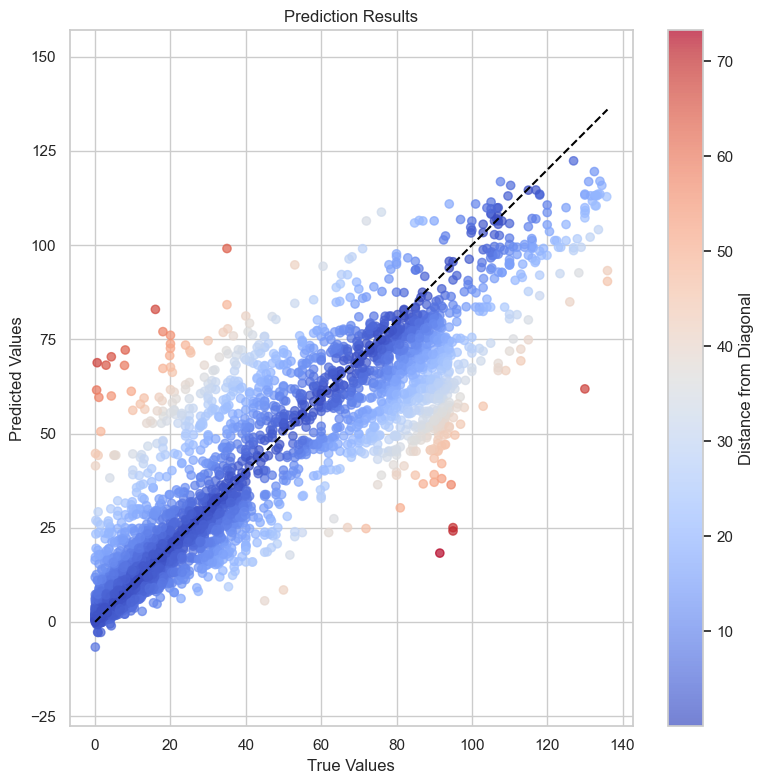

In [22]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Results

In [27]:
data_new = {
    'Model': ['RandomForestRegressor', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost', 'CatBoost'],
    'Tuning': ['Before Tuning', 'Before Tuning', 'After Tuning (100 iterations, 10 CV)', 'After Tuning (50 iterations, 5 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)', 'Before Tuning', 'After Tuning (50 iterations, 5 CV)', 'After Tuning (100 iterations, 10 CV)', 'After Hyperopt Tuning (100 iterations)', 'After Hyperopt Tuning (50 iterations)'],
    'MSE': [0.0107, 0.0100, 0.0110, 0.0141, 0.0093, 0.0066, 0.0095, 0.0060, 0.0064, 0.0091, 0.0093],
    'MAE': [0.0688, 0.0684, 0.0748, 0.0802, 0.0654, 0.0536, 0.0668, 0.0513, 0.0529, 0.0637, 0.0627],
    'R2': [0.6906, 0.7092, 0.6801, 0.5901, 0.7302, 0.8086, 0.7245, 0.8269, 0.8136, 0.7349, 0.7149],
    'MAPE': [8.53, 7.92, 14.59, 16.60, 10.05, 8.81, 9.85, 7.86, 6.74, 5.23, 6.24]
}

df = pd.DataFrame(data_new)
df

,Model,Tuning,MSE,MAE,R2,MAPE
0,RandomForestRegressor,Before Tuning,0.0107,0.0688,0.6906,8.53
1,XGBoost,Before Tuning,0.0100,0.0684,0.7092,7.92
2,XGBoost,"After Tuning (100 iterations, 10 CV)",0.0110,0.0748,0.6801,14.59
3,XGBoost,"After Tuning (50 iterations, 5 CV)",0.0141,0.0802,0.5901,16.60
4,XGBoost,After Hyperopt Tuning (100 iterations),0.0093,0.0654,0.7302,10.05
5,XGBoost,After Hyperopt Tuning (50 iterations),0.0066,0.0536,0.8086,8.81
6,CatBoost,Before Tuning,0.0095,0.0668,0.7245,9.85
7,CatBoost,"After Tuning (50 iterations, 5 CV)",0.0060,0.0513,0.8269,7.86
8,CatBoost,"After Tuning (100 iterations, 10 CV)",0.0064,0.0529,0.8136,6.74
9,CatBoost,After Hyperopt Tuning (100 iterations),0.0091,0.0637,0.7349,5.23


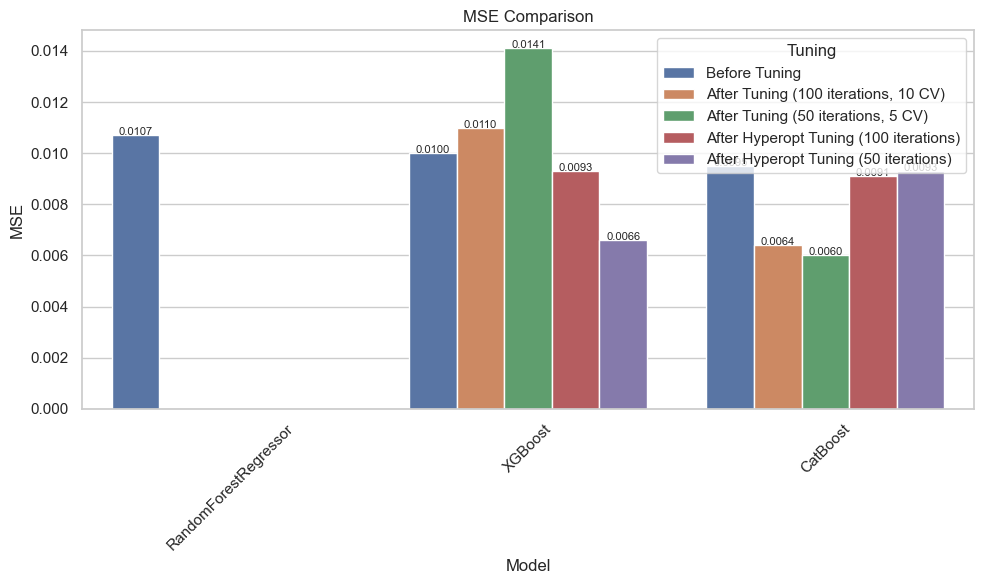

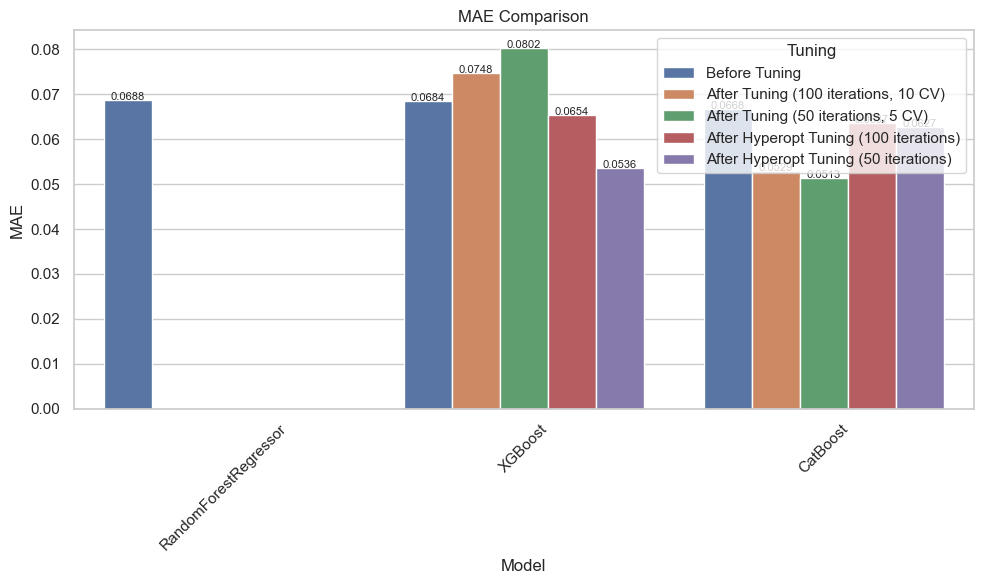

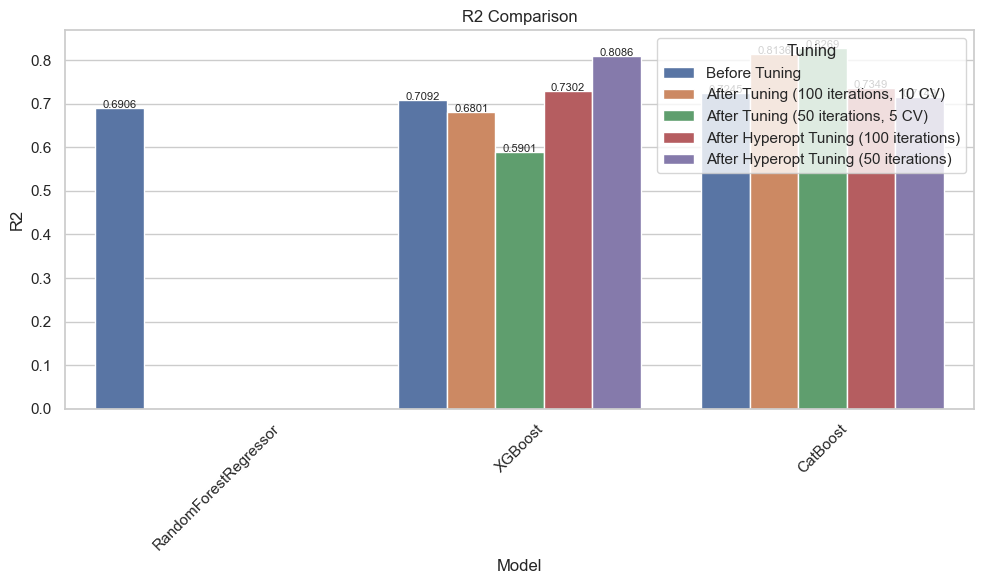

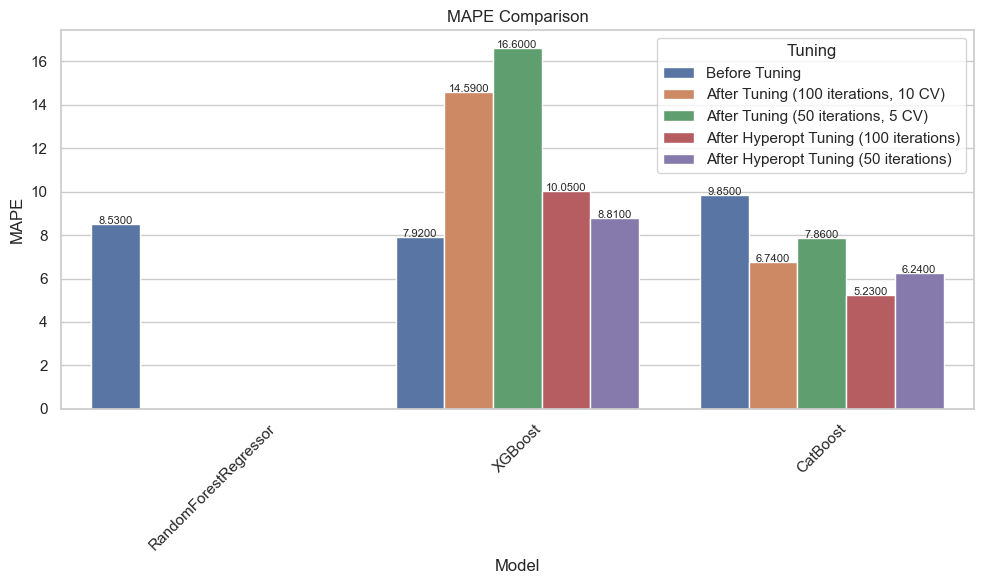

In [28]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MSE', hue='Tuning', data=df)
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8) 

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAE', hue='Tuning', data=df)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2', hue='Tuning', data=df)
plt.title('R2 Comparison')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAPE', hue='Tuning', data=df)
plt.title('MAPE Comparison')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)  
plt.tight_layout()
plt.show()